# k-nearest neighbors

# Q1. k-nearest neightbors を用いたクラス分類について調べ、<br>そのアルゴリズムについて説明せよ。

# A1. 

## k-nearest neightborsとは

- n次元空間に存在するデータを使い新しいデータにラベル名をつける教師あり学習である。  
- n次元空間に存在するデータはラベル(データ名)と位置情報を元に領域が分かれている。  
- n次元空間に新しくラベルを持たないデータを入れた時、  
  新しいデータから最も近いk個のデータを見つけ、多数決により新しいデータのラベル名を決める。  
  
以上が、  
k-nearest neightborsを用いたクラス分類である。  

引用：https://ja.wikipedia.org/wiki/K%E8%BF%91%E5%82%8D%E6%B3%95

<img src="images/k-nn.png">


# k-nearest neightborsのアルゴリズムについて

k-nearest neightborsを解く為に必要な手順は以下。    
**1. 新しく入るデータと既存データとの距離の測り方**  
**2. 新しいデータが所属するグループを決める方法**  
**3. k個のデータ数を決める方法**  

1,2,3を解決することでk-nearest neightborsの問題を解くことができる。

## 1. 新しく入るデータと既存データとの距離の測り方

距離の測り方の一つにユーグリット距離がある。  
**ユーグリット距離とは**次元空間において二点間を最短距離で線形に測る方法。  
以下の図にある様に**二次元**の場合の距離の測り方は  
<img src="images/euclidean_1.png">

n次元になると以下の様にして求めることができる。
<img src="images/euclidean_2.png">

<img src="images/euclidean.png">

引用：https://ja.wikipedia.org/wiki/%E3%83%A6%E3%83%BC%E3%82%AF%E3%83%AA%E3%83%83%E3%83%89%E8%B7%9D%E9%9B%A2

## 2. 新しいデータが付けるラベルを決める方法

- 新しいデータ点を入れた場所からユーグリット距離を測る。  
- 新しいデータ点から最も近いk個のデータが持つラベルの最も多いグループのラベル名を付ける。  
この時、k個の個数だけに依存しており、選ばれたk個それぞれが新しいデータ点からの距離には意味を持たない。

## 3. k個のデータ数を決める方法

- k個の数を決める方法は既存データの数に依存する。  
- 指定する方法のひとつに、既存データ数の平方根をとり求めた数を使う。  
- 何パターンかkの個数を変えて学習させ、検証結果の精度で判断する。  

# Q2. 上述のアルゴリズムを Numpy を用いて実装し、Iris データに適用せよ。

# A2. 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

iris = load_iris()

In [2]:
iris.target  # irisデータセットのラベルを確認

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
iris.feature_names  # irisデータセットに記載されているデータの名前

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# irisデータをdataframeへ(カラム名はデータセットについている花弁とガクの長さと幅)
df = pd.DataFrame(
    iris.data,
    columns = iris.feature_names
)
df["label"] = iris.target  # irisデータセットにあるラベルを列を追加

In [5]:
df = df.sample(frac=1).reset_index(drop=True)  # irisデータをシャッフルし、インデックスを0から順に直す

In [6]:
df.head()  

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.9               3.2                4.8               1.8   
1                6.0               2.2                5.0               1.5   
2                6.0               2.9                4.5               1.5   
3                4.9               2.4                3.3               1.0   
4                7.4               2.8                6.1               1.9   

   label  
0      1  
1      2  
2      1  
3      1  
4      2

In [7]:
df.shape

(150, 5)

In [8]:
print("scipyモジュールでの計算結果の数", len(scipy.spatial.distance.pdist(df, metric='euclidean')))
print("150個データに対して自分自身を除く計算結果の数", 150*149/2)

scipyモジュールでの計算結果の数 11175
150個データに対して自分自身を除く計算結果の数 11175.0


In [9]:
"""squareformモジュールを使い、全データに対しての距離を出す行列で出力(150 x 150 種類)"""
square_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(df, metric='euclidean'))  # 正方行列取得(対角成分も含まれる)
square_matrix[0]

array([0.        , 1.46287388, 0.52915026, 2.12837967, 2.26053091,
       2.30217289, 3.88072158, 0.42426407, 4.24970587, 3.9736633 ,
       1.37113092, 1.27279221, 3.59861084, 4.01870626, 4.49221549,
       3.74833296, 1.62788206, 3.87685439, 0.7       , 1.22474487,
       0.6244998 , 1.16619038, 1.19163753, 3.68510515, 3.66878727,
       1.17473401, 1.62788206, 0.52915026, 2.24276615, 1.6       ,
       3.99374511, 0.93273791, 1.7175564 , 4.00749298, 3.04302481,
       3.84707681, 1.48660687, 1.56843871, 1.04403065, 3.87943295,
       4.25440948, 3.89101529, 1.12694277, 1.17473401, 1.3190906 ,
       1.37477271, 1.26491106, 1.37477271, 3.82753184, 3.64142829,
       0.86023253, 1.36381817, 4.45533388, 0.85440037, 1.30384048,
       1.46287388, 3.87556448, 1.94422221, 1.0198039 , 0.46904158,
       0.93273791, 1.5132746 , 1.4832397 , 3.91152144, 4.1       ,
       4.07553677, 1.59687194, 1.32287566, 3.64828727, 0.97467943,
       4.04969135, 4.01995025, 3.99249296, 0.82462113, 0.68556

In [10]:
for i in range(150):
    label = 'distance_%s' % i
    df[label] = square_matrix[i]  # 計算された距離をdataframeへ追加(例: カラムdistance_0とは0行目が他の行との距離を計算した結果の列)

In [11]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.9               3.2                4.8               1.8   
1                6.0               2.2                5.0               1.5   
2                6.0               2.9                4.5               1.5   
3                4.9               2.4                3.3               1.0   
4                7.4               2.8                6.1               1.9   

   label  distance_0  distance_1  distance_2  distance_3  distance_4  \
0      1    0.000000    1.462874    0.529150    2.128380    2.260531   
1      2    1.462874    0.000000    1.319091    2.321637    1.920937   
2      1    0.529150    1.319091    0.000000    1.774824    2.385372   
3      1    2.128380    2.321637    1.774824    0.000000    4.007493   
4      2    2.260531    1.920937    2.385372    4.007493    0.000000   

       ...       distance_140  distance_141  distance_142  distance_143  \
0      ...           3.915354      2.694439      4.162932      4.153312   
1      ...           4.731807      2.473863      4.704253      4.697872   
2      ...           3.681032      2.887906      3.830144      3.835362   
3      ...           3.039737      4.555217      2.588436      2.513961   
4      ...           5.732364      0.608276      6.067949      6.113919   

   distance_144  distance_145  distance_146  distance_147  distance_148  \
0      3.903844      1.367479      1.483240      3.635932      1.063015   
1      4.465423      1.910497      0.734847      4.263801      1.431782   
2      3.588872      1.004988      1.523155      3.337664      0.866025   
3      2.282542      0.959166      2.816026      2.147091      2.485961   
4      5.881326      3.295451      1.493318      5.625833      1.816590   

   distance_149  
0      1.445683  
1      1.345362  
2      1.621727  
3      3.146427  
4      1.224745  

[5 rows x 155 columns]

In [12]:
# 1データが全データとの距離を計算できたのでソートして近い順番にし、その中でも最短5つを集める(0を除く)
label_dict = {}
for j in range(150):
    sort_label = 'distance_%s' % j
    label_dict[sort_label] = df.sort_values(by=sort_label)[1:6]['label']

In [13]:
label_dict['distance_1']  # 自分自身を除く一番近いラベル5個をそれぞれ取得 , 例として'distance_1'を表示

54     2
109    2
22     2
19     2
125    2
Name: label, dtype: int64

In [14]:
# 最短5個が持つラベルから多数決を取り一番多いラベルを取得
prediction_result = {}
for v in range(150):
    predict_label = 'distance_%s' % v
    prediction_result[v] = list(Counter(label_dict[predict_label]))[0]

In [15]:
df["pred_label"] = prediction_result.values()  # 上記で見つけたラベルを予測値としてdataframeへ列として追加

In [16]:
comparison_value = 0
for pred, correct in zip(prediction_result.values(), df['label']):
    comparison_value+= abs(pred - correct)
comparison_value   # 予測したラベルと正解ラベルを比較した結果　間違いは1つもなし！？

0

In [17]:
pd.set_option('display.max_rows', 150)  # jupyter 表示域で行を0~149まで全て表示

In [18]:
df.loc[:,['label','pred_label']]  # 'label'=正解ラベル、 'pred_label'=予測ラベル　

# 全て一致している。

label  pred_label
0        1           1
1        2           2
2        1           1
3        1           1
4        2           2
5        2           2
6        0           0
7        1           1
8        0           0
9        0           0
10       1           1
11       2           2
12       0           0
13       0           0
14       0           0
15       0           0
16       1           1
17       0           0
18       1           1
19       2           2
20       1           1
21       2           2
22       2           2
23       0           0
24       0           0
25       1           1
26       2           2
27       1           1
28       2           2
29       2           2
30       0           0
31       1           1
32       2           2
33       0           0
34       2           2
35       0           0
36       2           2
37       2           2
38       2           2
39       0           0
40       0           0
41       0           0
42       1           1
43       1           1
44       2           2
45       2           2
46       2           2
47       2           2
48       0           0
49       0           0
50       1           1
51       1           1
52       0           0
53       1           1
54       2           2
55       2           2
56       0           0
57       2           2
58       1           1
59       1           1
60       1           1
61       1           1
62       2           2
63       0           0
64       0           0
65       0           0
66       2           2
67       2           2
68       0           0
69       1           1
70       0           0
71       0           0
72       0           0
73       1           1
74       1           1
75       2           2
76       1           1
77       0           0
78       1           1
79       0           0
80       1           1
81       1           1
82       1           1
83       2           2
84       2           2
85       2           2
86       2           2
87       1           1
88       1           1
89       0           0
90       0           0
91       1           1
92       1           1
93       2           2
94       1           1
95       2           2
96       1           1
97       2           2
98       2           2
99       0           0
100      1           1
101      0           0
102      0           0
103      2           2
104      2           2
105      0           0
106      2           2
107      1           1
108      1           1
109      2           2
110      1           1
111      2           2
112      0           0
113      1           1
114      1           1
115      0           0
116      1           1
117      0           0
118      2           2
119      0           0
120      0           0
121      1           1
122      0           0
123      2           2
124      1           1
125      2           2
126      0           0
127      2           2
128      2           2
129      2           2
130      0           0
131      2           2
132      1           1
133      0           0
134      0           0
135      1           1
136      2           2
137      1           1
138      1           1
139      1           1
140      0           0
141      2           2
142      0           0
143      0           0
144      0           0
145      1           1
146      2           2
147      0           0
148      1           1
149      2           2

## 上記までの予測したラベルと正解ラベルをプロットして見比べる

In [19]:
df_correct_answer_0 = df.groupby('label').get_group(0)
df_correct_answer_1 = df.groupby('label').get_group(1)
df_correct_answer_2 = df.groupby('label').get_group(2)

df_prediction_0 = df.groupby('pred_label').get_group(0)
df_prediction_1 = df.groupby('pred_label').get_group(1)
df_prediction_2 = df.groupby('pred_label').get_group(2)

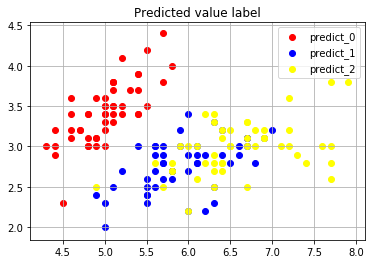

In [20]:
# x = np.random.rand(100)
# y = np.random.rand(100)
# x = df["sepal length (cm)"]
# y = df["sepal width (cm)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Predicted value label')
# ax.scatter(x,y, c='red', label='group1')
ax.scatter(df_prediction_0["sepal length (cm)"], df_prediction_0["sepal width (cm)"], c='red', label='predict_0')
ax.scatter(df_prediction_1["sepal length (cm)"], df_prediction_1["sepal width (cm)"], c='blue', label='predict_1')
ax.scatter(df_prediction_2["sepal length (cm)"], df_prediction_2["sepal width (cm)"], c='yellow', label='predict_2')

ax.grid(True)
ax.legend(loc='upper right')
# 予測したラベルのプロット

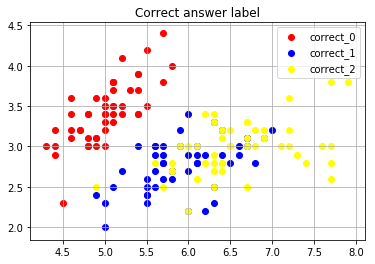

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Correct answer label')
# ax.scatter(x,y, c='red', label='group1')
ax.scatter(df_correct_answer_0["sepal length (cm)"], df_correct_answer_0["sepal width (cm)"], c='red', label='correct_0')
ax.scatter(df_correct_answer_1["sepal length (cm)"], df_correct_answer_1["sepal width (cm)"], c='blue', label='correct_1')
ax.scatter(df_correct_answer_2["sepal length (cm)"], df_correct_answer_2["sepal width (cm)"], c='yellow', label='correct_2')

ax.grid(True)
ax.legend(loc='upper right')
# 正解ラベルのプロット

# テスト

# 上記で使われているアルゴリズムは正しく動いているかをテスト
**ユーグリット距離の計算が正しくされているか?から始める**
<img src="images/test1.png">

## ユーグリット距離の計算は間違えていないか？
**scipy.spatial.distance.squareform(scipy.spatial.distance.pdist()** このモジュールを利用している

In [22]:
# ソースコードで上記計算を実行してみる
test_input = pd.DataFrame(data=([[1,2], [3,4], [5,6]]), columns=('A','B'))

In [23]:
test_input

A  B
0  1  2
1  3  4
2  5  6

In [24]:
# ユーグリット距離をscipyモジュールを使い計算する
test_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(test_input, metric='euclidean'))

In [25]:
test_matrix
# 計算結果は間違ってはいないことがわかった。

array([[0.        , 2.82842712, 5.65685425],
       [2.82842712, 0.        , 2.82842712],
       [5.65685425, 2.82842712, 0.        ]])

## 最小値のk個を正しく選べているか？

In [26]:
# for文でソートした後、値0を除く3個を取得させます。

test_input = pd.DataFrame(data=([[1,4, 0], [5,8, 1], [9,12, 2], [1.5,3, 0], [5.5,7, 1], [9.5,11, 2], [0.5,2, 0], [6,6.5, 1], [10,11.5, 2]]), columns=('A','B', 'label'))
test_input.loc[:,['A','B']]  # labelカラムを除く
test_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(test_input, metric='euclidean'))
for i in range(3):
    label = 'distance_%s' % i
    test_input[label] = test_matrix[i]
    
label_dict = {}
for j in range(3):
    sort_label = 'distance_%s' % j
    label_dict[sort_label] = test_input.sort_values(by=sort_label)[1:4]['label']
    
    

In [27]:
# 上記で取得した最小値3個をそれぞれの行で表示
print("各列が値0を除く、最小3個を選択しているか確認\n(行、label名)\n")

print("distance_0列\n", label_dict['distance_0'])
print("\n distance_1列\n", label_dict['distance_1'])
print("\n distance_2列\n", label_dict['distance_2'])

各列が値0を除く、最小3個を選択しているか確認
(行、label名)

distance_0列
 3    0
6    0
4    1
Name: label, dtype: int64

 distance_1列
 4    1
7    1
5    2
Name: label, dtype: int64

 distance_2列
 5    2
8    2
1    1
Name: label, dtype: int64


## 選ばれたリストの中で多数決を正しく出来ているか？
**Counterモジュールを利用** 

In [28]:
# 最小値を集めたリストの中から多数決を行う
count_result = {}
for v in range(3):
    predict_label = 'distance_%s' % v
#     count_result[v] = list(Counter(label_dict[predict_label]))[0]
    count_result[v] = Counter(label_dict[predict_label])

In [29]:
# 予測の行(distance_行番号)：{label名': 個数}  多い方が先頭にきており、index[0]を取得すると最多数が取得できる。
count_result  



{0: Counter({0: 2, 1: 1}), 1: Counter({1: 2, 2: 1}), 2: Counter({2: 2, 1: 1})}

In [30]:
# 多数決を行なった結果の表示 {行名：多数決の結果ラベル}
count_result = {}
for v in range(3):
    predict_label = 'distance_%s' % v
    count_result[v] = list(Counter(label_dict[predict_label]))[0]

In [31]:
count_result

{0: 0, 1: 1, 2: 2}

**カウントをした結果が3つの中から多い個数を選択している。**  
**以上より、正しく多数決が出来ていることを示す。**

# 別のアルゴリズムを試す  (scipyモジュールを使わないやり方)

In [32]:
# データを用意
test_input = pd.DataFrame(data=([[1,4, 0], [5,8, 1], [9,12, 2], [1.5,3, 0], [5.5,7, 1], [9.5,11, 2], [0.5,2, 0], [6,6.5, 1], [10,11.5, 2]]), columns=('A','B', 'label'))
test_input


A     B  label
0   1.0   4.0      0
1   5.0   8.0      1
2   9.0  12.0      2
3   1.5   3.0      0
4   5.5   7.0      1
5   9.5  11.0      2
6   0.5   2.0      0
7   6.0   6.5      1
8  10.0  11.5      2

In [33]:
# # リストに3個の値入れて、新しい値が来た時にリスト内と比較しmax(list) > 新しい値　であれば入れ替える
# # ただし、この方法だと行数との紐付けがうまくできなかったので使わなかった
# import numpy as np

# minimum_list = []
# row_result = {}
# distance_list = []
# for i in range(len(test_input)):
#     key_name = "row_%s" % i
#     for j in range(len(test_input)):
#         if j == i:
#             pass
#         else:    # 0 ~ 最後まで
#             # print("iとj: ", i, j)
#             if len(distance_list) > 2:  # リストに3個まで
#                 # print(print(distance_list))  # 最新の3個
#                 input_new_value = np.sqrt(np.power(test_input['A'][i]-test_input['A'][j], 2)+np.power(test_input['B'][i]-test_input['B'][j], 2))
#                 if max(distance_list) > input_new_value:  # 現在のリスト内の値より新しい値が近い値の場合
#                     distance_list.remove(max(distance_list))
#                     distance_list.append(input_new_value)
#                 else:  # 現在のリストが最小値のものだけの場合
#                     pass
#             else:
#                 distance_list.append(np.sqrt(np.power(test_input['A'][i]-test_input['A'][j], 2)+np.power(test_input['B'][i]-test_input['B'][j], 2)))
            
#     row_result[key_name] = distance_list     
#     distance_list = []
# row_result  # 最小値3個を集めたリスト    

In [34]:
# ユーグリット距離を計算する

# リストに3個の値入れて、新しい値が来た時にリスト内と比較しmax(list) > 新しい値　であれば入れ替える
import numpy as np

minimum_list = []
row_result = {}
distance_list = []
for i in range(len(test_input)):
    key_name = "row_%s" % i
    for j in range(len(test_input)):
#         if j == i:
#             pass
#         else:
            distance_list.append(np.sqrt(np.power(test_input['A'][i]-test_input['A'][j], 2)+np.power(test_input['B'][i]-test_input['B'][j], 2)))
            
    row_result[key_name] = distance_list     
    distance_list = []
# row_result  # 全ての距離を集めた結果

In [35]:
# 距離計算した結果をdataframeへ追加する
for key in row_result.keys():
    column_name = "distance_%s" % key
    test_input[column_name] = row_result[key]

In [36]:
test_input

A     B  label  distance_row_0  distance_row_1  distance_row_2  \
0   1.0   4.0      0        0.000000        5.656854       11.313708   
1   5.0   8.0      1        5.656854        0.000000        5.656854   
2   9.0  12.0      2       11.313708        5.656854        0.000000   
3   1.5   3.0      0        1.118034        6.103278       11.715375   
4   5.5   7.0      1        5.408327        1.118034        6.103278   
5   9.5  11.0      2       11.011358        5.408327        1.118034   
6   0.5   2.0      0        2.061553        7.500000       13.124405   
7   6.0   6.5      1        5.590170        1.802776        6.264982   
8  10.0  11.5      2       11.715375        6.103278        1.118034   

   distance_row_3  distance_row_4  distance_row_5  distance_row_6  \
0        1.118034        5.408327       11.011358        2.061553   
1        6.103278        1.118034        5.408327        7.500000   
2       11.715375        6.103278        1.118034       13.124405   
3        0.000000        5.656854       11.313708        1.414214   
4        5.656854        0.000000        5.656854        7.071068   
5       11.313708        5.656854        0.000000       12.727922   
6        1.414214        7.071068       12.727922        0.000000   
7        5.700877        0.707107        5.700877        7.106335   
8       12.020815        6.363961        0.707107       13.435029   

   distance_row_7  distance_row_8  
0        5.590170       11.715375  
1        1.802776        6.103278  
2        6.264982        1.118034  
3        5.700877       12.020815  
4        0.707107        6.363961  
5        5.700877        0.707107  
6        7.106335       13.435029  
7        0.000000        6.403124  
8        6.403124        0.000000

In [37]:
# scipyモジュールテスト同様にソートして0番目以降の最小値3つを選択、その値が持つ行からlabelを取得する
label_dict = {}
for key in row_result.keys():
    sort_label = 'distance_%s' % key
    label_dict[sort_label] = test_input.sort_values(by=sort_label)[1:4]['label']

In [38]:
label_dict

{'distance_row_0': 3    0
 6    0
 4    1
 Name: label, dtype: int64, 'distance_row_1': 4    1
 7    1
 5    2
 Name: label, dtype: int64, 'distance_row_2': 5    2
 8    2
 1    1
 Name: label, dtype: int64, 'distance_row_3': 0    0
 6    0
 4    1
 Name: label, dtype: int64, 'distance_row_4': 7    1
 1    1
 0    0
 Name: label, dtype: int64, 'distance_row_5': 8    2
 2    2
 1    1
 Name: label, dtype: int64, 'distance_row_6': 3    0
 0    0
 4    1
 Name: label, dtype: int64, 'distance_row_7': 4    1
 1    1
 0    0
 Name: label, dtype: int64, 'distance_row_8': 5    2
 2    2
 1    1
 Name: label, dtype: int64}

In [39]:
# 最短距離を集めたリストから多数決をする {行名：多数決した結果のラベル}
count_result = {}
for key in row_result.keys():
    predict_label = 'distance_%s' % key
    count_result[key] = list(Counter(label_dict[predict_label]))[0]

In [40]:
count_result  # 行ごとに予測したラベルを表示　結果としては正解している。

{'row_0': 0,
 'row_1': 1,
 'row_2': 2,
 'row_3': 0,
 'row_4': 1,
 'row_5': 2,
 'row_6': 0,
 'row_7': 1,
 'row_8': 2}